In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('extended_data.csv')

In [3]:
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [4]:
df.shape

(28143, 8)

In [5]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [6]:
df.describe()

,model_year,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28126.000000,28143.000000,2.812600e+04,28143.000000
mean,2013.456774,21.769242,0.533525,5.736535e+04,0.137299
std,6.847536,13.472177,0.498884,6.146327e+04,0.344169
min,1974.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,17.000000,0.000000,3.000000e+04,0.000000
50%,2015.000000,20.000000,1.000000,4.120000e+04,0.000000
75%,2019.000000,24.000000,1.000000,6.400000e+04,0.000000
max,2024.000000,234.000000,1.000000,2.500000e+06,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df['brand'].nunique()

57

In [9]:
df['model'].nunique()

1898

In [10]:
df = df.drop(columns=['model'])

In [11]:
df = df.drop(columns=['collection_car'])

In [12]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp
0,2016,Toyota,SUV,13.0,1,84900.0
1,2014,RAM,Van,15.0,0,35000.0
2,2002,Ford,Coupe,16.0,0,26250.0
3,2012,BMW,Sedan,27.0,1,45000.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0
...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0
28139,2001,Mazda,Coupe,18.0,0,25000.0
28140,2018,Ford,SUV,94.0,1,199000.0
28141,2022,Land,SUV,20.0,1,63700.0


In [13]:
df.shape

(28143, 6)

In [14]:
df['miles_per_gallon'].median()

20.0

In [15]:
df['miles_per_gallon'].fillna(df['miles_per_gallon'].median(), inplace = True)

In [16]:
df.isnull().sum()

model_year           0
brand                0
type                 0
miles_per_gallon     0
premium_version      0
msrp                17
dtype: int64

In [17]:
df['msrp'].fillna(df['msrp'].median(), inplace = True)

In [18]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp
0,2016,Toyota,SUV,13.0,1,84900.0
1,2014,RAM,Van,15.0,0,35000.0
2,2002,Ford,Coupe,16.0,0,26250.0
3,2012,BMW,Sedan,27.0,1,45000.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0
...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0
28139,2001,Mazda,Coupe,18.0,0,25000.0
28140,2018,Ford,SUV,94.0,1,199000.0
28141,2022,Land,SUV,20.0,1,63700.0


In [19]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)


In [20]:
cat

['brand', 'type']

In [21]:
num

['model_year', 'miles_per_gallon', 'premium_version', 'msrp']

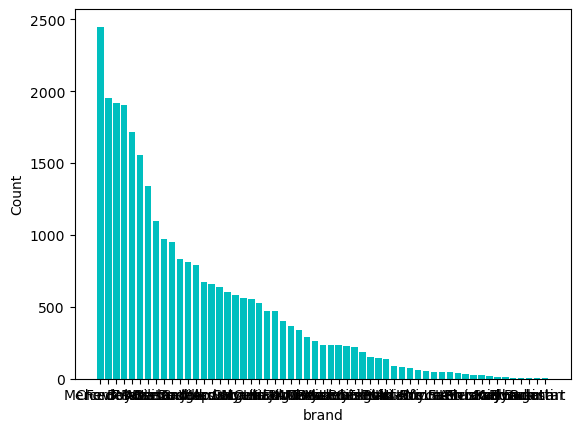

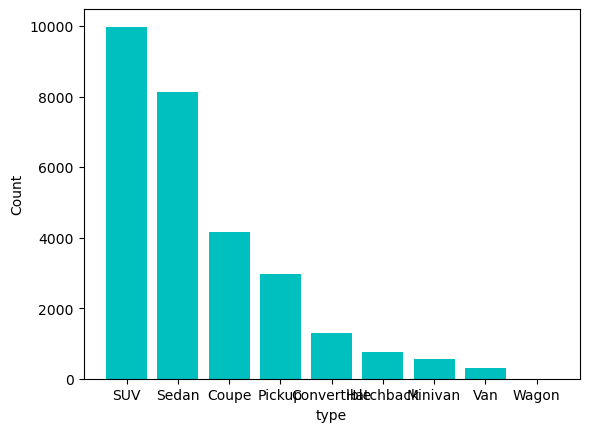

In [22]:
for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height = vc , color = 'c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

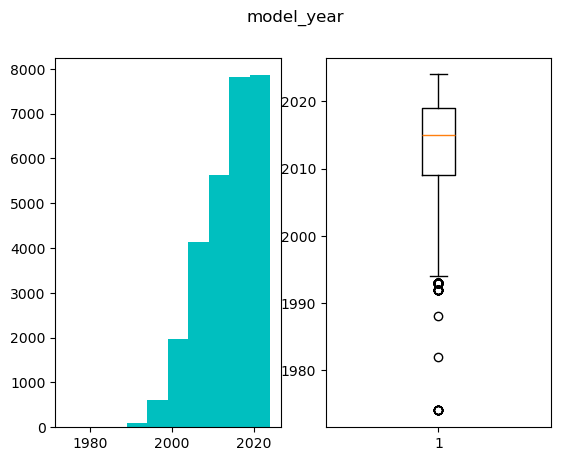

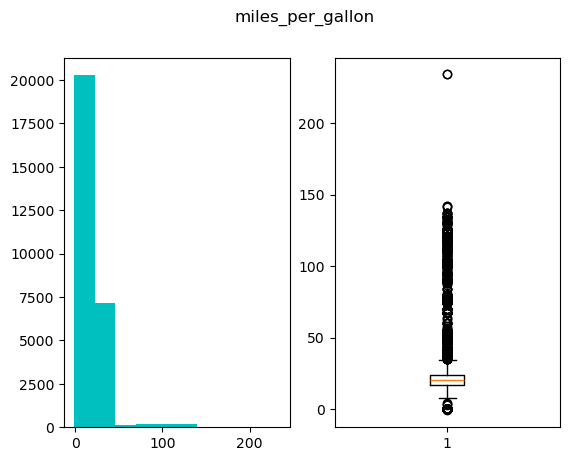

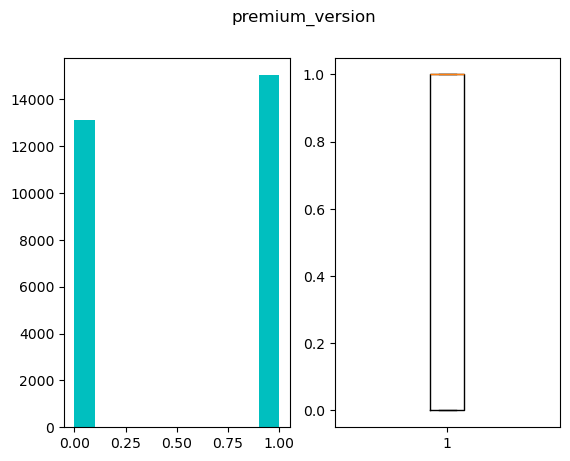

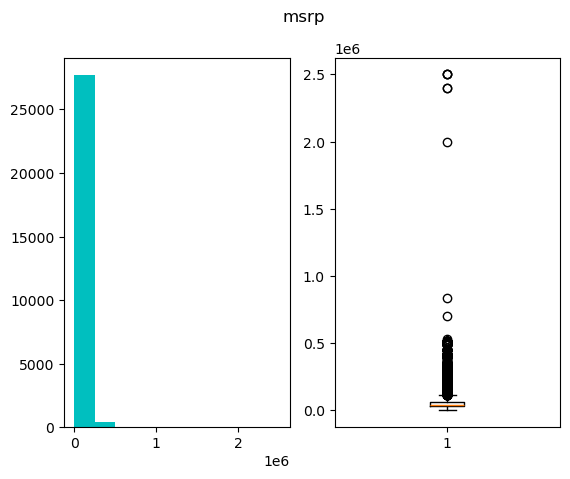

In [23]:
# Numerical

for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(df[i],color = 'c')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [24]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp
0,2016,Toyota,SUV,13.0,1,84900.0
1,2014,RAM,Van,15.0,0,35000.0
2,2002,Ford,Coupe,16.0,0,26250.0
3,2012,BMW,Sedan,27.0,1,45000.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0
...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0
28139,2001,Mazda,Coupe,18.0,0,25000.0
28140,2018,Ford,SUV,94.0,1,199000.0
28141,2022,Land,SUV,20.0,1,63700.0


In [25]:
# One hot encoder 

from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder(sparse_output = False)
type = ohe.fit_transform(df[['type']])
type

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [27]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [28]:
type_df = pd.DataFrame(type, columns = ohe.categories_)
type_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
type_df.drop('Convertible', axis = 1, inplace = True)


In [30]:
type_df

,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
df = pd.concat([df, type_df], axis = 1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
ohe = OneHotEncoder(sparse_output = False)
brand = ohe.fit_transform(df[['brand']])
brand

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [34]:
brand_df = pd.DataFrame(brand, columns = ohe.categories_)
brand_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
brand_df.drop('Acura',axis = 1 ,inplace = True)
brand_df

,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,Chrysler,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df = pd.concat([df, brand_df], axis = 1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cat

['brand', 'type']

In [38]:
num

['model_year', 'miles_per_gallon', 'premium_version', 'msrp']

In [39]:
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
x_df = df.drop(['type','brand','msrp','model_year'], axis = 1)
y = df['msrp']

In [42]:
x_df

,miles_per_gallon,premium_version,"(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,13.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,21.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,18.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,94.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,20.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y

0         84900.0
1         35000.0
2         26250.0
3         45000.0
4        100000.0
           ...   
28138    200000.0
28139     25000.0
28140    199000.0
28141     63700.0
28142     83500.0
Name: msrp, Length: 28143, dtype: float64

In [46]:
X = x_df.values

In [47]:
Y = y.values

In [50]:
X

array([[13.,  1.,  0., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.],
       [16.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [94.,  1.,  0., ...,  0.,  0.,  0.],
       [20.,  1.,  0., ...,  0.,  0.,  0.],
       [22.,  1.,  0., ...,  0.,  0.,  0.]])

In [51]:
Y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19700, 66)
(8443, 66)
(19700,)
(8443,)


# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [61]:
y_train_pred = lr_model.predict(x_train)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np  # For sqrt function


In [63]:
mse_t = mean_squared_error(y_train, y_train_pred)  # Correct order
rmse_t = np.sqrt(mse_t)  # RMSE = sqrt of MSE
mae_t = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)  # Correct order

# Print results
print("MSE (Train):", mse_t)
print("RMSE (Train):", rmse_t)
print("MAE (Train):", mae_t)
print("R² Score (Train):", r2_train)


MSE (Train): 1149405576.0305882
RMSE (Train): 33902.884479503926
MAE (Train): 17349.636784263934
R² Score (Train): 0.7131654509853182


## Testing

In [69]:
y_test_pred = lr_model.predict(x_test)

In [70]:
mse_test = mean_squared_error(y_test, y_test_pred)  # Correct order
rmse_test = np.sqrt(mse_test)  # RMSE = sqrt of MSE
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)  # Correct order

# Print results
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAE (Test):", mae_test)
print("R² Score (Test):", r2_test)


MSE (Test): 1611265611.0600128
RMSE (Test): 40140.57312819552
MAE (Test): 17708.843275271225
R² Score (Test): 0.5017330080876996


## Polynomial regression --- y = mx*2 + c¶

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

In [78]:
x_train[0].size

66

In [79]:
X_poly_train[0].size

2278

In [81]:
x_train[0]

array([21.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [82]:
X_poly_train[0]

array([ 1., 21.,  1., ...,  0.,  0.,  0.])

In [83]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

array([ 71481.81245266, 122626.49405025,  49740.00882597, ...,
        28063.15241105,  31022.54131953,  48827.33100529])

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
mse_poly_train = mean_squared_error(y_train, y_poly_pred)  
rmse_poly_train = mean_squared_error(y_train, y_poly_pred) ** 0.5  # RMSE is sqrt of MSE
mae_poly_train = mean_absolute_error(y_train, y_poly_pred)  
r2_poly_train = r2_score(y_train, y_poly_pred)  

# Print results
print("MSE (Train):", mse_poly_train)
print("RMSE (Train):", rmse_poly_train)
print("MAE (Train):", mae_poly_train)
print("R² Score (Train):", r2_poly_train)

MSE (Train): 954211069.0359986
RMSE (Train): 30890.307040170363
MAE (Train): 15134.564588864967
R² Score (Train): 0.7618763060146541


## Testing

In [87]:
y_poly_test_pred = poly_model.predict(X_poly_test)

In [88]:
# Calculating evaluation metrics
mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
rmse_poly_test = mse_poly_test ** 0.5  # RMSE is the square root of MSE
mae_poly_test = mean_absolute_error(y_test, y_poly_test_pred)
r2_poly_test = r2_score(y_test, y_poly_test_pred)  # Corrected order

# Printing the results
print("MSE (Test):", mse_poly_test)
print("RMSE (Test):", rmse_poly_test)
print("MAE (Test):", mae_poly_test)
print("R² Score (Test):", r2_poly_test)


MSE (Test): 1424149094.1143067
RMSE (Test): 37737.89996958372
MAE (Test): 15485.098237568382
R² Score (Test): 0.559596828550117


# Assumptions of linaer regression

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson as dw
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import probplot, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

def test_linear_regression_assumptions(x, y, x_df):
    """ 
    Tests key assumptions of linear regression: Linearity, Independence, Homoscedasticity,
    Normality, and No Multicollinearity.

    Parameters:
    x (DataFrame): Independent variables
    y (Series): Dependent variable
    x_df (DataFrame): Original independent variable dataframe (before adding constant)

    Returns: 
    None
    """

    # Add constant for intercept
    x = sm.add_constant(x)

    # Fit OLS model
    ols_model = sm.OLS(y, x).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues

    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

    # 2. No Autocorrelations: Independence of Errors (Durbin-Watson Test)
    print("2. Independence of Errors (Durbin-Watson test):\n")
    dw_stat = dw(residuals)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if 1.5 <= dw_stat <= 2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity (Breusch-Pagan Test)
    print("3. Homoscedasticity (Breusch-Pagan Test):\n")
    bp_test = het_breuschpagan(residuals, x)
    print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] > 0.05:
        print("Residuals have constant variance (Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals are normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformations or robust regression.\n")

    # 5. Multicollinearity (Variance Inflation Factor)
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_df.columns
    vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



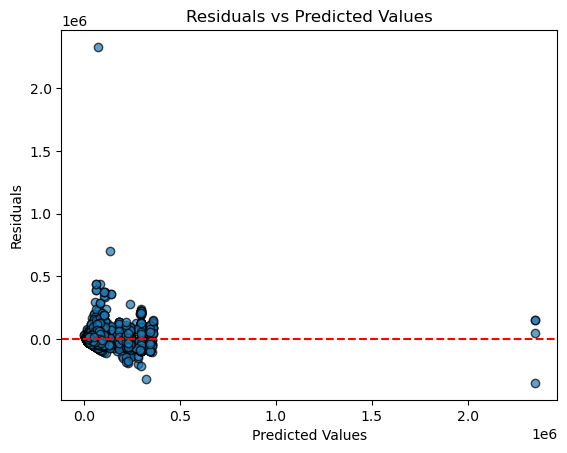

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2. Independence of Errors (Durbin-Watson test):

Durbin-Watson statistic: 1.9877379539794298
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test):

Lagrange Multiplier Statistic: 109.20153643509974
p-value: 0.0006576852034208179
Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.

4. Normality of Errors:



C:\Users\91981\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


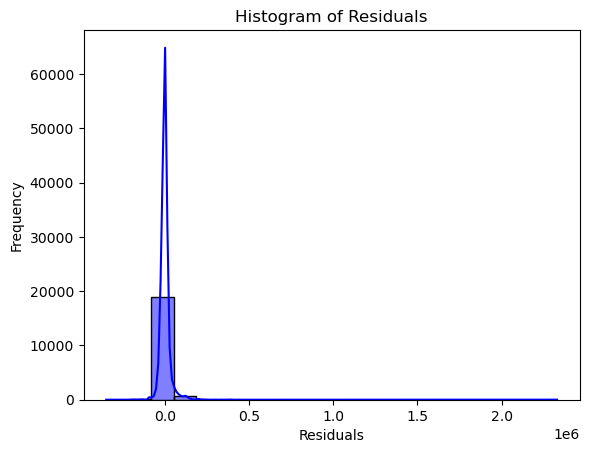

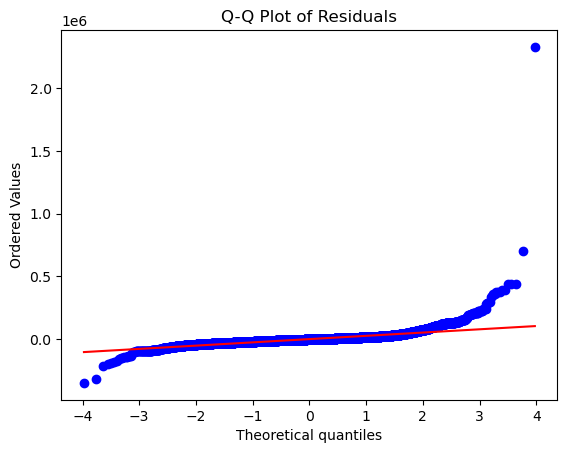

C:\Users\91981\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test p-value: 0.0
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):

             Feature       VIF
0   miles_per_gallon  5.586684
1    premium_version  2.565124
2           (Coupe,)  3.452104
3       (Hatchback,)  1.803518
4         (Minivan,)  1.387087
..               ...       ...
61          (Tesla,)  1.773782
62         (Toyota,)  2.142757
63     (Volkswagen,)  1.487896
64          (Volvo,)  1.203165
65          (smart,)  1.002466

[66 rows x 2 columns]
No significant multicollinearity detected.



In [97]:
test_linear_regression_assumptions(x_train,y_train,x_df)

# Lasso

In [100]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Lasso Model
l1 = Lasso(alpha=1.0)
l1.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l1 = l1.predict(x_train)

# Metrics Calculation on Training Data
mse_l1_train = mean_squared_error(y_train, y_pred_train_l1)
rmse_l1_train = mean_squared_error(y_train, y_pred_train_l1, squared=False)  # Correct RMSE calculation
mae_l1_train = mean_absolute_error(y_train, y_pred_train_l1)
r2_l1_train = r2_score(y_train, y_pred_train_l1)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l1_train)
print("RMSE:", rmse_l1_train)
print("MAE:", mae_l1_train)
print("R²:", r2_l1_train)

# Predictions on Test Data
y_pred_test_l1 = l1.predict(x_test)

# **Corrected Order: (y_true, y_pred)**
mse_l1_test = mean_squared_error(y_test, y_pred_test_l1)
rmse_l1_test = mean_squared_error(y_test, y_pred_test_l1, squared=False)  # Correct RMSE calculation
mae_l1_test = mean_absolute_error(y_test, y_pred_test_l1)
r2_l1_test = r2_score(y_test, y_pred_test_l1)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l1_test)
print("RMSE:", rmse_l1_test)
print("MAE:", mae_l1_test)
print("R²:", r2_l1_test)


Training Performance:
MSE: 1149458653.7411628
RMSE: 33903.66726094926
MAE: 17347.450618807943
R²: 0.7131522054247494

Test Performance:
MSE: 1611089579.4314828
RMSE: 40138.38037877815
MAE: 17701.962591133495
R²: 0.5017874440226733


# Ridge

In [104]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Ridge Model
l2 = Ridge(alpha=1.0)
l2.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l2 = l2.predict(x_train)

# Metrics Calculation on Training Data
mse_l2_train = mean_squared_error(y_train, y_pred_train_l2)
rmse_l2_train = mean_squared_error(y_train, y_pred_train_l2, squared=False)  # Correct RMSE calculation
mae_l2_train = mean_absolute_error(y_train, y_pred_train_l2)
r2_l2_train = r2_score(y_train, y_pred_train_l2)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l2_train)
print("RMSE:", rmse_l2_train)
print("MAE:", mae_l2_train)
print("R²:", r2_l2_train)

# Predictions on Test Data
y_pred_test_l2 = l2.predict(x_test)

# Metrics Calculation on Test Data
mse_l2_test = mean_squared_error(y_test, y_pred_test_l2)
rmse_l2_test = mean_squared_error(y_test, y_pred_test_l2, squared=False)  # Correct RMSE calculation
mae_l2_test = mean_absolute_error(y_test, y_pred_test_l2)
r2_l2_test = r2_score(y_test, y_pred_test_l2)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l2_test)
print("RMSE:", rmse_l2_test)
print("MAE:", mae_l2_test)
print("R²:", r2_l2_test)


Training Performance:
MSE: 1193407030.8494341
RMSE: 34545.72377081474
MAE: 17486.424390651402
R²: 0.7021848731004083

Test Performance:
MSE: 1613919474.4775503
RMSE: 40173.61664671915
MAE: 17791.705335909428
R²: 0.5009123286584821


# Elastic Net

In [107]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize ElasticNet (L1 + L2 regularization)
l1_l2 = ElasticNet(alpha=1.0)
l1_l2.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l1_l2 = l1_l2.predict(x_train)

# Metrics Calculation on Training Data
mse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2)
rmse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_train = mean_absolute_error(y_train, y_pred_train_l1_l2)
r2_l1_l2_train = r2_score(y_train, y_pred_train_l1_l2)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l1_l2_train)
print("RMSE:", rmse_l1_l2_train)
print("MAE:", mae_l1_l2_train)
print("R²:", r2_l1_l2_train)

# Predictions on Test Data
y_pred_test_l1_l2 = l1_l2.predict(x_test)

# Metrics Calculation on Test Data
mse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2)
rmse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_test = mean_absolute_error(y_test, y_pred_test_l1_l2)
r2_l1_l2_test = r2_score(y_test, y_pred_test_l1_l2)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l1_l2_test)
print("RMSE:", rmse_l1_l2_test)
print("MAE:", mae_l1_l2_test)
print("R²:", r2_l1_l2_test)


Training Performance:
MSE: 3608124048.5490413
RMSE: 60067.662253071256
MAE: 28311.208995712004
R²: 0.09959142722390069

Test Performance:
MSE: 2860324859.257366
RMSE: 53482.00500408868
MAE: 27680.066418915216
R²: 0.11547453521549844


# KNN Regression

In [110]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the KNN Regressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)

# Predictions on Training Data
y_train_knn = knn_r.predict(x_train)

# Training Metrics
mse_knn_train = mean_squared_error(y_train, y_train_knn)
rmse_knn_train = mse_knn_train ** 0.5
mae_knn_train = mean_absolute_error(y_train, y_train_knn)
r2_knn_train = r2_score(y_train, y_train_knn)

print("Training Metrics:")
print("MSE:", mse_knn_train)
print("RMSE:", rmse_knn_train)
print("MAE:", mae_knn_train)
print("R² Score:", r2_knn_train)

# Predictions on Test Data
y_test_knn = knn_r.predict(x_test)

# Testing Metrics
mse_knn_test = mean_squared_error(y_test, y_test_knn)
rmse_knn_test = mse_knn_test ** 0.5
mae_knn_test = mean_absolute_error(y_test, y_test_knn)
r2_knn_test = r2_score(y_test, y_test_knn)

print("\nTesting Metrics:")
print("MSE:", mse_knn_test)
print("RMSE:", rmse_knn_test)
print("MAE:", mae_knn_test)
print("R² Score:", r2_knn_test)


Training Metrics:
MSE: 587536971.9039979
RMSE: 24239.161947229073
MAE: 12174.266365482232
R² Score: 0.8533799505762532

Testing Metrics:
MSE: 749335116.632633
RMSE: 27373.986129766214
MAE: 13176.57309013384
R² Score: 0.7682759739077629


# Support vector regression

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the SVR model
svr = SVR()
svr.fit(x_train, y_train)

# Predictions on Training Data
y_train_svr = svr.predict(x_train)

# Training Metrics
mse_svr_train = mean_squared_error(y_train, y_train_svr)  # Corrected order
rmse_svr_train = mse_svr_train ** 0.5  # Taking square root for RMSE
mae_svr_train = mean_absolute_error(y_train, y_train_svr)
r2_svr_train = r2_score(y_train, y_train_svr)

print("Training Metrics:")
print("MSE:", mse_svr_train)
print("RMSE:", rmse_svr_train)
print("MAE:", mae_svr_train)
print("R² Score:", r2_svr_train)

# Predictions on Test Data
y_test_svr = svr.predict(x_test)

# Testing Metrics
mse_svr_test = mean_squared_error(y_test, y_test_svr)
rmse_svr_test = mse_svr_test ** 0.5
mae_svr_test = mean_absolute_error(y_test, y_test_svr)
r2_svr_test = r2_score(y_test, y_test_svr)

print("\nTesting Metrics:")
print("MSE:", mse_svr_test)
print("RMSE:", rmse_svr_test)
print("MAE:", mae_svr_test)
print("R² Score:", r2_svr_test)


# Decision tree regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth= 10, random_state=0)
dtree.fit(x_train, y_train)

# Predictions on Training Data
y_train_dtree = dtree.predict(x_train)

# Training Metrics
mse_dtree_train = mean_squared_error(y_train, y_train_dtree)  # Corrected order
rmse_dtree_train = mse_dtree_train ** 0.5  # Taking square root for RMSE
mae_dtree_train = mean_absolute_error(y_train, y_train_dtree)
r2_dtree_train = r2_score(y_train, y_train_dtree)

print("Training Metrics:")
print("MSE:", mse_dtree_train)
print("RMSE:", rmse_dtree_train)
print("MAE:", mae_dtree_train)
print("R² Score:", r2_dtree_train)

# Predictions on Test Data
y_test_dtree = dtree.predict(x_test)

# Testing Metrics
mse_dtree_test = mean_squared_error(y_test, y_test_dtree)
rmse_dtree_test = mse_dtree_test ** 0.5
mae_dtree_test = mean_absolute_error(y_test, y_test_dtree)
r2_dtree_test = r2_score(y_test, y_test_dtree)

print("\nTesting Metrics:")
print("MSE:", mse_dtree_test)
print("RMSE:", rmse_dtree_test)
print("MAE:", mae_dtree_test)
print("R² Score:", r2_dtree_test)


Training Metrics:
MSE: 1096902474.6068997
RMSE: 33119.5180310176
MAE: 17442.463916099736
R² Score: 0.7262676176467534

Testing Metrics:
MSE: 1511127157.5452676
RMSE: 38873.21902731066
MAE: 17822.790672830914
R² Score: 0.5326997746251649


# Random forest regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the Random Forest Regressor
forest = RandomForestRegressor(max_depth= 20, n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

# Predictions on Training Data
y_train_forest = forest.predict(x_train)

# Training Metrics
mse_forest_train = mean_squared_error(y_train, y_train_forest)  # Corrected order
rmse_forest_train = mse_forest_train ** 0.5  # Taking square root for RMSE
mae_forest_train = mean_absolute_error(y_train, y_train_forest)
r2_forest_train = r2_score(y_train, y_train_forest)

print("Training Metrics:")
print("MSE:", mse_forest_train)
print("RMSE:", rmse_forest_train)
print("MAE:", mae_forest_train)
print("R² Score:", r2_forest_train)

# Predictions on Test Data
y_test_forest = forest.predict(x_test)

# Testing Metrics
mse_forest_test = mean_squared_error(y_test, y_test_forest)
rmse_forest_test = mse_forest_test ** 0.5
mae_forest_test = mean_absolute_error(y_test, y_test_forest)
r2_forest_test = r2_score(y_test, y_test_forest)

print("\nTesting Metrics:")
print("MSE:", mse_forest_test)
print("RMSE:", rmse_forest_test)
print("MAE:", mae_forest_test)
print("R² Score:", r2_forest_test)


Training Metrics:
MSE: 547575237.6525054
RMSE: 23400.32558860037
MAE: 12509.773560935208
R² Score: 0.8633524148316087

Testing Metrics:
MSE: 1266988482.4163234
RMSE: 35594.7816739522
MAE: 13683.855417598052
R² Score: 0.6081970994802055


# xgboost regression

In [122]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

# Evaluate Model Performance
mse_xgb_train = mean_squared_error(y_train, y_pred_train_xgb)
rmse_xgb_train = mse_xgb_train ** 0.5
mae_xgb_train = mean_absolute_error(y_train, y_pred_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_train_xgb)

mse_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
rmse_xgb_test = mse_xgb_test ** 0.5
mae_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_test_xgb)

# Print results
print("Train Performance:")
print("MSE:", mse_xgb_train)
print("RMSE:", rmse_xgb_train)
print("MAE:", mae_xgb_train)
print("R²:", r2_xgb_train)

print("\nTest Performance:")
print("MSE:", mse_xgb_test)
print("RMSE:", rmse_xgb_test)
print("MAE:", mae_xgb_test)
print("R²:", r2_xgb_test)

Train Performance:
MSE: 580909890.0204868
RMSE: 24102.072317966496
MAE: 13457.05145184667
R²: 0.8550337410945703

Test Performance:
MSE: 1237295493.6571667
RMSE: 35175.21135199001
MAE: 14041.996568041166
R²: 0.6173793448458083
